## Mathematics and Statistics for Analytics - Homework Assignment 2

Authors: Raffi Sahakyan, Yuxuan Luo, Shufan Chen
<br>
Date: 25 Nov, 2019

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset
We will be using a banking marketing dataset. 
The dataset is associated with direct marketing campaigns of a banking institution. Your job is to find out the best strategies to improve for the next marketing campaign. How can the bank have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

You have to predict whether a customer subscribes for term deposit or not using the following attributes: 

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balance: balance amount (numeric)<br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set. 

In [1]:
#Impotying Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn model, metrics, scaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Defined functions
from classification_utils import * 

# to ignore warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

# magic to not to call show every time 
%matplotlib inline

In [2]:
X = pd.read_excel("features_ex2.xlsx")
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown


In [3]:
#Calling info to inspect for null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 15 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
dtypes: int64(6), object(9)
memory usage: 529.9+ KB


In [4]:
y = pd.read_excel("label_ex2.xlsx")
y.head(3)

,y
0,no
1,no
2,no


In [5]:
categories = ['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical = pd.get_dummies(X[categories], drop_first=True) #need to drop one of the dummy columns to eliminate multicollinearity
continuous = X.drop(columns=categories)
X = pd.concat([continuous,categorical],axis=1)

In [6]:
#splitting data into train, cv and test set (70:15:15 ratio)
X_train = X.iloc[0:3165,:]
y_train = y.iloc[0:3165,:].y.astype("category").cat.reorder_categories(["no","yes"]).cat.codes #reordering no/yes categories to 0,1 for sklearn operations
#and reshaping values
X_cv = X.iloc[3165:3843,:]
y_cv = y.iloc[3165:3843,:].y.astype("category").cat.reorder_categories(["no","yes"]).cat.codes #reordering no/yes categories to 0,1 for sklearn operations
#and reshaping values
X_test = X.iloc[3843:4521,:]

In [7]:
print("X_train "+ str(X_train.shape))
print("y_train "+ str(y_train.shape))
print("X_cv "+ str(X_cv.shape))
print("y_cv "+ str(y_cv.shape))
print("X_test "+ str(X_test.shape))

X_train (3165, 41)
y_train (3165,)
X_cv (678, 41)
y_cv (678,)
X_test (678, 41)


## Standardization

As discussed in previous exercise, standardization is important when a number of features with different scales are involed. 

Q. Use StandardScaler from sklearn.preprocessing to standardize the continuous features. 


In [8]:
scaler = StandardScaler()

continuous_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Use the above list to replace the continuous columns in X_train to scaled columns. Use fit_transform method.
X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])
X_train.head(2)

,age,balance,day,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056635,0.148995,0.377404,-0.574287,-0.401779,-0.332182,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.770712,1.236383,-0.597187,-0.574287,3.058498,2.239942,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [9]:
# Similarily use the above list to replace the continuous columns in X_cv and X_test to scaled columns. Use transform method.
X_cv[continuous_variables] = scaler.transform(X_cv[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

## Classification

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Q. Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [10]:
# First, initialize the classifier with default parameters
model_logit = LogisticRegression(random_state=42) #Even though default parameters were required, We are specifying random state for reproducibility of findings 
# then fit the classifier on training data and labels
model_logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# predict the output for cross validation dataset
y_pred = model_logit.predict(X_cv)

Implement precision(), recall(), accuracy() in exercise_2.py, and use them below.

In [12]:
# Using the predictions to calculate accuracy, precision, recall

### WRITE CODE HERE
print("Accuracy on cv set: ",round(accuracy(y_cv,y_pred)*100,3),"%")
print("Precision on cv set: ",round(precision(y_cv,y_pred)*100,3),"%")
print("Recall on cv set: ",round(recall(y_cv,y_pred)*100,3),"%")

Accuracy on cv set:  89.233 %
Precision on cv set:  47.368 %
Recall on cv set:  12.5 %


In [13]:
#We will compare our defined functions with sklearn to be sure
print("Accuracy on cv set with sklearn: ",round(accuracy_score(y_cv,y_pred)*100,3),"%")
print("Precision on cv set with sklearn: ",round(precision_score(y_cv,y_pred)*100,3),"%")
print("Recall on cv set with sklearn: ",round(recall_score(y_cv,y_pred)*100,3),"%")

Accuracy on cv set with sklearn:  89.233 %
Precision on cv set with sklearn:  47.368 %
Recall on cv set with sklearn:  12.5 %


__Q. Accuracy__<br>
_Ans_ - 89.233 %

__Q. Precision__<br>
_Ans_ - 47.368 %

__Q. Recall__<br>
_Ans_ - 12.5 %

__Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain.__ <br>
_Ans_ - Accuracy does not perform well with imbalanced data sets. For example, if dataset contains 95% negative and 5% positive samples, classifying all as negative gives 0.95 accuracy score. In application of accuracy equal cost is placed on false negatives and false positives. General accuracy score may be useful in case of balanced classification problems, for example predicting customer gender. 
<br>
<br>
Precision can be seen as a measure of exactness or quality. Precision score is the most useful in cases when the true positive values are important in comparison with all predicted positives: such as credit card default dataset, insurance case dataset of accidents, terrorist classification based on human characteristics, patient death dataset in healthcare and etc. Precision is mainly applicable in cases when the dataset is imbalanced(negatives are more frequent than positives), but it is crucial to predict positives. All the 4 mentioned cases precision should be more useful than accuracy. 
<br>
<br>
Recall is a measure of completeness or quantity. Recall score is the most useful in cases when the true positive values are important in comparison with all positives. It is hard to distinguish cases when recall will be the sole metric applicable, since recall and precision can be applied to same cases. In credit card default dataset one may value recall over precision, when the KPI will be attached to real defaults. The same can be applied to other examples of precision. When the KPI is derived from the positive values only, recall may be more applicable.

__Q. Which metric is suitable in this case?__ <br>
_Ans_ - First we need to identify the class weights in our dataset

In [14]:
#We need to get understanding about the class weights in our dataset
print("Weight 1: ", round(sum(y_train==1)/len(y_train)*100,3),"%")
print("Weight 0: ", round(sum(y_train==0)/len(y_train)*100,3),"%")

Weight 1:  11.564 %
Weight 0:  88.436 %


As we can observe the class weights are not balanced, so we will elliminate the accuracy as a metric for model tuning. With regards to recall and precision, I would assume that marketing strategy evaluation will be attached to the accurace prediction of positives compared with overall positives. For the latter reason, Recall is more useful in this scenario.

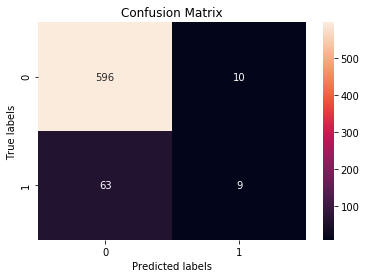

In [15]:
#Plotting the confusion matrix for 
cm = confusion_matrix(y_cv,y_pred) #confusion matrix

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g')  #heatmap, fmt='g' converts scientific to float
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

#last version of seaborn is messing the heatmap when working with matplotlib
#so we have to adjust these lines
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

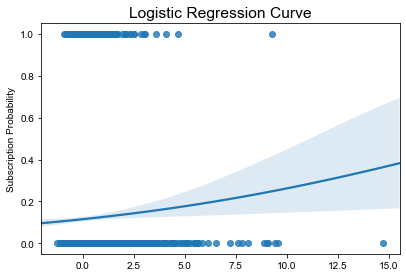

In [16]:
#Squeezing xs
i=1
squeezed_x = X_train.iloc[:, i: i + 1].values.squeeze()

#Plotting the Logistic regression
sns.regplot(x=squeezed_x, y=y_train, logistic=True)

sns.set(font_scale=1.3)
plt.title('Logistic Regression Curve')
plt.ylabel('Subscription Probability')
plt.subplots_adjust(right=0.93, top=0.90, left=0.10, bottom=0.10)

### ROC curve

Q. Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. USe cv set to make predictions.

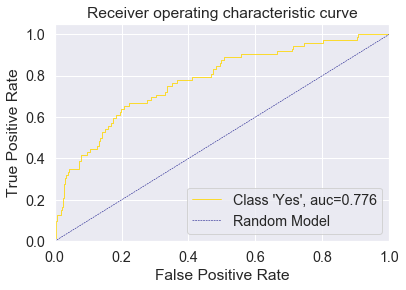

In [17]:
#Calculations
y_pred_proba = model_logit.predict_proba(X_cv)[::,1] #Predicted probabilities
fpr, tpr, _ = roc_curve(y_cv,  y_pred_proba)
auc = roc_auc_score(y_cv, y_pred_proba)

#Plotting
plt.plot(fpr,tpr,label="Class 'Yes', auc="+str(round(auc,3)), color='gold',lw=.8)
plt.plot([0, 1], [0, 1], color='navy', lw=.5, linestyle='--', label='Random Model')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.style.use('fivethirtyeight')

__Q. What is the AUC obtained?__<br>
_Ans_ - 0.776

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 





Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [18]:
### WRITE CODE HERE
model_logit_1 = LogisticRegression(C=.1,penalty='l1',random_state=42)
model_logit_1.fit(X_train,y_train)

y_pred_1 = model_logit_1.predict(X_cv)
y_pred_proba_1 = model_logit_1.predict_proba(X_cv)[::,1] #Predicted probabilities


print("Accuracy on cv set: ",round(accuracy(y_cv,y_pred_1)*100,3),"%")
print("Precision on cv set: ",round(precision(y_cv,y_pred_1)*100,3),"%")
print("Recall on cv set: ",round(recall(y_cv,y_pred_1)*100,3),"%")
print("F1 Score on cv set: ",round(f1_score(y_cv,y_pred_1)*100,3),"%")
print("ROC AUC Score on cv set: ",round(roc_auc_score(y_cv,y_pred_proba_1),3))

Accuracy on cv set:  89.823 %
Precision on cv set:  60.0 %
Recall on cv set:  12.5 %
F1 Score on cv set:  20.69 %
ROC AUC Score on cv set:  0.752


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [19]:
model_logit_2 = LogisticRegression(C=.5,penalty='l1',random_state=42)
model_logit_2.fit(X_train,y_train)

y_pred_2 = model_logit_2.predict(X_cv)
y_pred_proba_2 = model_logit_2.predict_proba(X_cv)[::,1] #Predicted probabilities

print("Accuracy on cv set: ",round(accuracy(y_cv,y_pred_2)*100,3),"%")
print("Precision on cv set: ",round(precision(y_cv,y_pred_2)*100,3),"%")
print("Recall on cv set: ",round(recall(y_cv,y_pred_2)*100,3),"%")
print("F1 Score on cv set: ",round(f1_score(y_cv,y_pred_2)*100,3),"%")
print("ROC AUC Score on cv set: ",round(roc_auc_score(y_cv,y_pred_proba_2),3))

Accuracy on cv set:  89.528 %
Precision on cv set:  52.381 %
Recall on cv set:  15.278 %
F1 Score on cv set:  23.656 %
ROC AUC Score on cv set:  0.777


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [20]:
### WRITE CODE HERE
model_logit_3 = LogisticRegression(C=.1,penalty='l2',random_state=42)
model_logit_3.fit(X_train,y_train)

y_pred_3 = model_logit_3.predict(X_cv)
y_pred_proba_3 = model_logit_3.predict_proba(X_cv)[::,1] #Predicted probabilities

print("Accuracy on cv set: ",round(accuracy(y_cv,y_pred_3)*100,3),"%")
print("Precision on cv set: ",round(precision(y_cv,y_pred_3)*100,3),"%")
print("Recall on cv set: ",round(recall(y_cv,y_pred_3)*100,3),"%")
print("F1 Score on cv set: ",round(f1_score(y_cv,y_pred_3)*100,3),"%")
print("ROC AUC Score on cv set: ",round(roc_auc_score(y_cv,y_pred_proba_3),3))

Accuracy on cv set:  89.971 %
Precision on cv set:  66.667 %
Recall on cv set:  11.111 %
F1 Score on cv set:  19.048 %
ROC AUC Score on cv set:  0.77


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on cross validation set and compute accuracy, precision and recall. 

In [21]:
### WRITE CODE HERE
model_logit_4 = LogisticRegression(C=.5,penalty='l2',random_state=42)
model_logit_4.fit(X_train,y_train)


y_pred_4 = model_logit_4.predict(X_cv)
y_pred_proba_4 = model_logit_4.predict_proba(X_cv)[::,1] #Predicted probabilities


print("Accuracy on cv set: ",round(accuracy(y_cv,y_pred_4)*100,3),"%")
print("Precision on cv set: ",round(precision(y_cv,y_pred_4)*100,3),"%")
print("Recall on cv set: ",round(recall(y_cv,y_pred_4)*100,3),"%")
print("F1 Score on cv set: ",round(f1_score(y_cv,y_pred_4)*100,3),"%")
print("ROC AUC Score on cv set: ",round(roc_auc_score(y_cv,y_pred_proba_4),3))

Accuracy on cv set:  89.381 %
Precision on cv set:  50.0 %
Recall on cv set:  12.5 %
F1 Score on cv set:  20.0 %
ROC AUC Score on cv set:  0.776


__Q. Which of the above models is better?__ <br>
_Ans_ - Model 2 is better since it is providing the best accuracy on our predetermined metric: recall. Additionally F1 score and ROC AUC scores are calculated for unified metrices. Model 2 is outperforming on this term as well.  

# Test set

You have worked on training and cv dataset so far, but testing data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set. You will submit a csv file containing your predictions names as predictions.csv.


In [22]:
##########################################
### Construct your final logistic regression using the best hyperparameters obtained above(C and penalty) ###
final_model = LogisticRegression(C=.5,penalty='l2',random_state=42)
final_model.fit(X_train, y_train)
predicted_0_1 = final_model.predict(X_test)

#Converting 0-no 1-yes
l=np.where(predicted_0_1==0, 'no', predicted_0_1)
m=np.where(l=='1','yes',l)

### save into csv with column heading as "y"

###UNCOMMENT IF YOU WANT TO UPDATE FILES, FILE ARE SUBMITTED WITH THE HOMEWORK

#np.savetxt("predicted_0_1.csv", predicted_0_1, delimiter=",", header='y', fmt='%g', comments='')
#np.savetxt("predictions.csv", m, delimiter=",", header='y', fmt='%s', comments='')